# The 10 armed bandit problem

Initially we pick k (10) values from a normal distribution with mu = 0 and sigma = 1

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import secrets

In [2]:
def setup_bandit(k):
    action_values = np.random.normal(0,1,k)
    return(action_values)

def greedy_actual_reward(action_values):
    opt_arm = np.argmax(action_values)
    reward = np.random.normal(action_values[opt_arm],1)
    return(reward)

def sample_average(sum_rewards, npulls):
    updated_average = sum_rewards/npulls
    return(updated_average)

def run_experiment(action_values, npulls):
    results_array = np.zeros(npulls)
    counter=0
    sum_rewards=0
    for _ in range(npulls):
        Rt = greedy_actual_reward(action_values)
        sum_rewards += Rt
        counter += 1
        average = sample_average(sum_rewards, counter)
        results_array[_] = average
    return(average, results_array)

def run_lots_of_experiments(k, npulls, nexperiments):
    results = np.zeros(nexperiments)
    counter=0
    sum_rewards=0
    for _ in range(nexperiments):
        action_values = np.random.normal(0,1,k) # Generate a new set of 10-armed bandits for each experiment
        experiment_result, average_array = run_experiment(action_values, npulls)
        results[_] = experiment_result
    print(results)
    return(results)

In [3]:
k = 10
av=setup_bandit(k)
print("Action Values = ",av)
print("The best arm is #",np.argmax(av), "which gives a value of " , av[np.argmax(av)])
npulls = 1000
average_reward, average_array = run_experiment(av, npulls)
print("For one run,the average reward is", average_reward)

Action Values =  [ 1.49254653  0.90075805  0.8790967  -0.04611066 -0.87069651 -0.27764873
 -0.73861571 -0.56551661  2.14043155  0.29471287]
The best arm is # 8 which gives a value of  2.1404315531748774
For one run,the average reward is 2.135031360576699


[2.66139916 2.00331294 2.22543518 1.83883179 2.30089711 2.29712279
 2.32477548 2.21141327 2.0995682  2.19717229 2.25554263 2.29300765
 2.27412575 2.29700141 2.30630159 2.19199001 2.19239288 2.24669447
 2.20381619 2.23089748 2.30122842 2.21745149 2.20833564 2.20960091
 2.22474209 2.17021021 2.15246535 2.15175063 2.15576619 2.2016014
 2.25330785 2.26364403 2.29681058 2.31534596 2.26330859 2.26328196
 2.27738146 2.32478132 2.28938668 2.2836636  2.29129996 2.27222072
 2.29796319 2.31887241 2.30993984 2.333866   2.29698153 2.31341175
 2.30201628 2.30680666 2.31324577 2.32665162 2.31917729 2.30981083
 2.33929114 2.34525617 2.33762827 2.3338549  2.36205842 2.3644386
 2.38566631 2.37776387 2.37671    2.35835542 2.33371952 2.32574458
 2.32240548 2.3344929  2.32998356 2.33558559 2.34087571 2.35585422
 2.34704827 2.3459022  2.34006008 2.30553361 2.29208312 2.28898267
 2.30075301 2.31531448 2.29862574 2.29522866 2.28829915 2.31168994
 2.30493977 2.31234126 2.3294742  2.34686728 2.33295842 2.332509

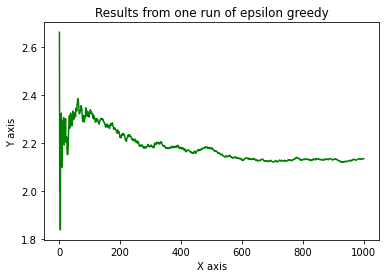

In [4]:
print(average_array, len(average_array))
# Plot the results of one run of a thousand pulls...
x=np.arange(1, len(average_array)+1)
y=average_array
print(x, len(x), len(y))
print(len(y))
plt.title("Results from one run of epsilon greedy")
plt.xlabel("X axis")
plt.ylabel("Y axis")
plt.plot(x, y, color ="green")
plt.show()

In [5]:
nexperiments = 2000
multi_exp = run_lots_of_experiments(k, npulls, nexperiments)

[1.53326354 1.55756413 1.64940297 ... 1.53793843 1.56447217 2.07303185]


In [6]:
print(multi_exp)

[1.53326354 1.55756413 1.64940297 ... 1.53793843 1.56447217 2.07303185]


[1.53326354 1.54541384 1.58007688 ... 1.56364651 1.56364692 1.56390162]
[   1    2    3 ... 1998 1999 2000] 2000 2000


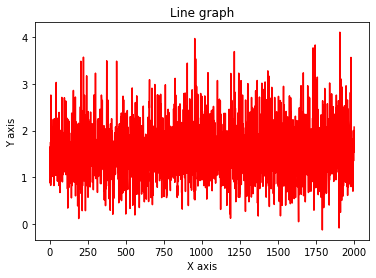

In [7]:
multi_exp_sample_av = np.zeros(nexperiments)
counter=0
sum_rewards=0
for count, value in enumerate(multi_exp):
    sum_rewards += value
    multi_exp_output = sample_average(sum_rewards, count + 1)
    multi_exp_sample_av[count] = multi_exp_output
#     print(count + 1, value, multi_exp_output, sum_rewards)
  
print(multi_exp_sample_av)

x=np.arange(1,nexperiments+1)
print(x, len(multi_exp_sample_av), len(x))
y=multi_exp_sample_av
plt.title("Line graph")
plt.xlabel("X axis")
plt.ylabel("Y axis")
plt.plot(x, multi_exp, color ="red")
plt.show()

# Start again: This time working as outlined on page 68 of lab book #2

In [8]:
# Get initial distribution for first experiment
k=10
action_value_mu=np.random.normal(0,1,k)
print(action_value_mu)
n_array=np.zeros(len(action_value_mu))
estimate_array = np.zeros(len(action_value_mu))
print(n_array)


[-0.01905383 -0.07542735 -0.83914042 -0.37413245 -2.59096423  0.74891375
 -0.59680721 -0.44722528  0.24605155 -1.60191293]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [58]:
def generate_bandit(k):
    """Generate a k-armed bandit as outlines in the book"""
    action_value_mu=np.random.normal(0,1,k)
    return action_value_mu
    
def pick_arm(action_value_mu, estimate_array, epsilon):
    k=len(estimate_array)
    if not np.any(estimate_array): #If the array is full of zeros then just pick an arm at random
        choice=np.random.randint(k)
#         print("all zeros")
    else:
        # Greedy and non-greedy choices
        if np.random.random() > 1-epsilon: #Explore
            choice = np.random.randint(k)
#             print("explore")
        else: #Exploit
            maxval = np.amax(estimate_array)
            if(maxval <= 0):
                choice = exploit_pick_neg_or_zeroes(estimate_array)
                #If all the non-zero values are < 0 then pick a random zero value
            else:
                choice = np.argmax(estimate_array)  #If there is one non-zero value (>0) then pick that.           
#             print("exploit")
#     print("pick arm", choice)
    mu=action_value_mu[choice]
    Rt = np.random.normal(mu,1)
    n_array[choice] += 1
    estimate_array[choice] = update_estimate_array(Rt, estimate_array[choice], n_array[choice])
    return(estimate_array, Rt)
 
def exploit_pick_neg_or_zeroes(estimate_array):
    """Take the estimate array, if all values are below 0 then pick the least negative one
    if some values are zero, and others below, pick a random zero from the contenders"""
    contenders = np.where(estimate_array >= 0)[0]
    if len(contenders) == 0:
        choice = np.argmax(estimate_array)
    else:
        choice = secrets.choice(contenders)
    return choice
    
def update_estimate_array(Rt, previous_value, n_pulls):
    updated_values = previous_value + ((1/n_pulls) * (Rt - previous_value))
    return(updated_values)

def reset_estimate_and_n_array(action_value_mu):
    estimate_array = np.zeros(len(action_value_mu))
    n_array = np.zeros(len(action_value_mu))
    return(estimate_array, n_array)



In [68]:
def run_experiment(k, npulls, epsilon):
    """Generate a k-armed bandit and pull the lever npull times"""
    action_value_mu = generate_bandit(10)
#     print(action_value_mu)
    estimate_array, n_array = reset_estimate_and_n_array(action_value_mu)
    scores = np.zeros(npulls)
    for _ in range(npulls):
        estimate_array, reward = pick_arm(action_value_mu, estimate_array, epsilon) #epsilon=0 means greedy
#         print(_, np.around(estimate_array,2), np.around(reward,4))
        scores[_]=reward
#     print(scores)
#     print(estimate_array)
    return(scores, estimate_array)

In [144]:
def run_multiple_exp(k, npulls, epsilon, nexp):
    for exp in range(nexp):
        if exp == 0:
            old_scores = np.zeros(npulls)
        new_scores, estimate_array = run_experiment(k=k, npulls=npulls, epsilon=epsilon)
        average_scores = scores_averaging(old_scores,new_scores,nexp)
        old_scores = new_scores
    return average_scores

def scores_averaging(old, new, nexp):
    new_av = old + ((1/(nexp+1))*(new-old))
    return new_av

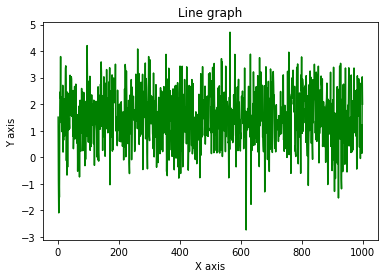

In [159]:
#Greedy run 1000 pulls, 2000 experiments
scores_array_average = run_multiple_exp(k=10, npulls=1000, epsilon=0, nexp=200)
x=np.arange(1,len(scores_array_average)+1)
y=scores_array_average
plt.title("Line graph")
plt.xlabel("X axis")
plt.ylabel("Y axis")
plt.plot(x, y, color ="green")
plt.show()

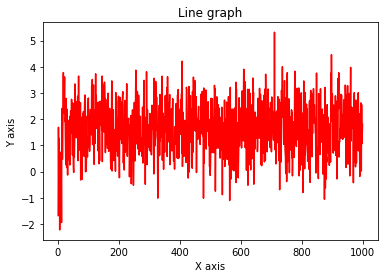

In [160]:
#Explore run 1000 pulls, 2000 experiments
scores_array_average = run_multiple_exp(k=10, npulls=1000, epsilon=0.01, nexp=200)
x=np.arange(1,len(scores_array_average)+1)
y=scores_array_average
plt.title("Line graph")
plt.xlabel("X axis")
plt.ylabel("Y axis")
plt.plot(x, y, color ="red")
plt.show()